Import necessary libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

Load the Dataset

In [5]:
import pandas as pd
df=pd.read_csv('/content/Thyroid_Diff.csv')

In [6]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


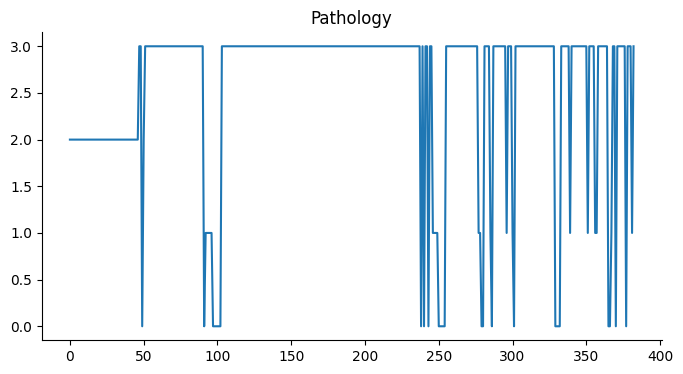

In [81]:
# @title Pathology

from matplotlib import pyplot as plt
df['Pathology'].plot(kind='line', figsize=(8, 4), title='Pathology')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


Split data into Training and Testing sets

In [36]:
X=df.drop('Age',axis=1)
y=df['Age']

#splitting the data into training and testing sets

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the data using StandardScaler

In [39]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the testing data (using the same fitted preprocessor)
X_test_scaled = preprocessor.transform(X_test)

Preprocess data

#Label Encoding

In [17]:
le=LabelEncoder()
df['Pathology']=le.fit_transform(df['Pathology'])

#One-Hot Encoding

In [19]:
ohe=OneHotEncoder()
df_ohe=ohe.fit_transform(df[['Risk']])

#Ordinal Encoding

In [20]:
oe=OrdinalEncoder()
df['Stage']=oe.fit_transform(df[['Stage']])

#checking encoded columns

In [21]:
print(df['Pathology'].unique())
print(df['Risk'].unique())
print(df['Stage'].unique())

[2 3 0 1]
['Low' 'Intermediate' 'High']
[0. 1. 4. 2. 3.]


Train and evaluate models for each category

In [46]:
for category in ["Pathology", "Risk", "Stage"]:
 X_train, X_test, y_train, y_test=train_test_split(df.drop(category, axis=1), df[category], test_size=0.2, random_state=42)

#Define the models

In [51]:
models={"Random Forest":
RandomForestClassifier(n_estimators=100),
  "Gradient Boosting":GradientBoostingClassifier(n_estimators=100),
  "SVM":SVC(probability=True)}

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#train the model

In [54]:
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
print(f"Model: {RandomForestClassifier}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         4

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Confusion Matrix:
[[70  0  0  0]
 [ 0  2  0  0]
 [ 0  0  1  0]
 [ 0  0  0  4]]


#Plot confusion matrix

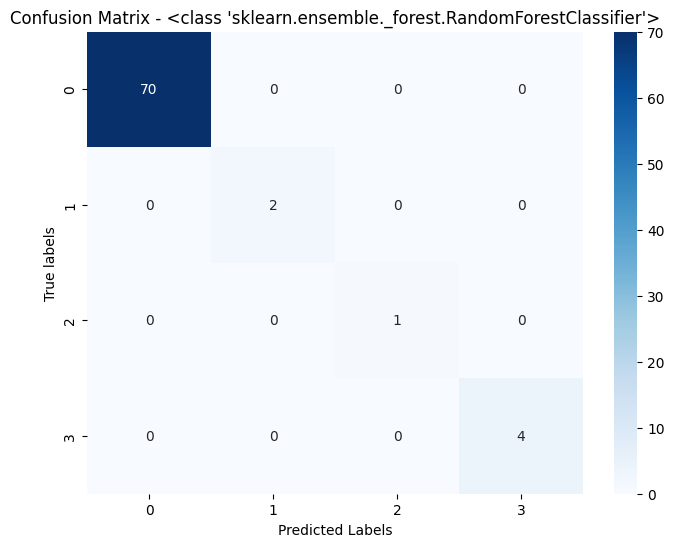

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title(f"Confusion Matrix - {RandomForestClassifier}")
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.show()


In [57]:
#Training a Logistic Regression model for the category "Pathology"
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred=logreg.predict(X_test_scaled)
print("Logistic Regression (Pathology)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression (Pathology)
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         4

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Confusion Matrix:
[[70  0  0  0]
 [ 0  2  0  0]
 [ 0  0  1  0]
 [ 0  0  0  4]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


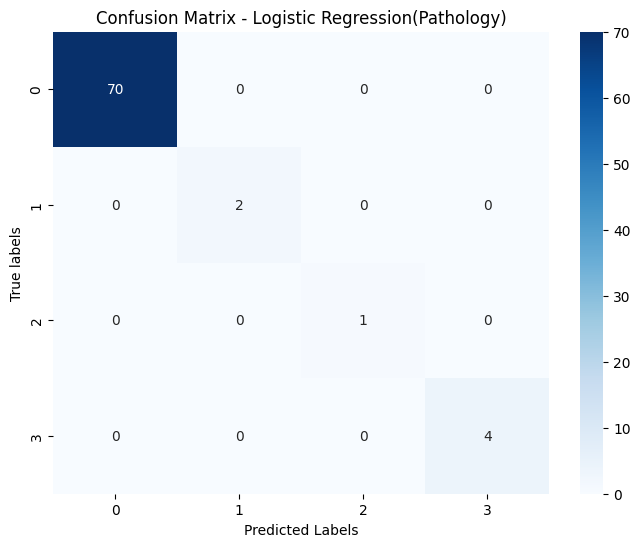

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title(f"Confusion Matrix - Logistic Regression(Pathology)")
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.show()

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [61]:
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)
accuracies=[]
accuracies.append(accuracy)

In [62]:
overall_accuracy=sum(accuracies)/len(accuracies)
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 1.0


In [64]:
#f1 score
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred, average='weighted')
print("F1 score:",f1)

F1 score: 1.0


In [69]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
#Precision
precision=precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

#Recall
recall=recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

#Classification Report
report=classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#Confusion Matrix
matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Precision: 1.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         4

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Confusion Matrix:
[[70  0  0  0]
 [ 0  2  0  0]
 [ 0  0  1  0]
 [ 0  0  0  4]]


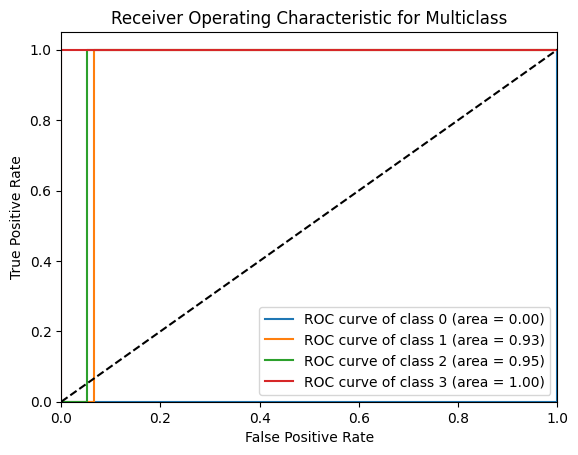

In [76]:
!pip install scikit-learn
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains multiclass labels (e.g., 0, 1, 2)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred) # Removed the second index from y_pred
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()

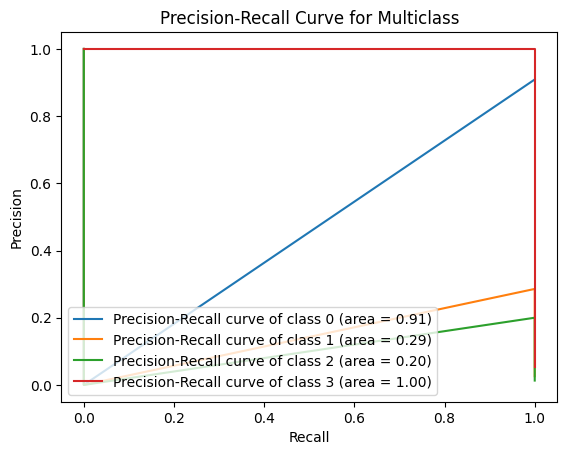

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    # y_pred is 1D, so we don't use the second index
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred)
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred)

# Plot the Precision-Recall curves
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc="lower left")
plt.show()